**Exercise 15.2b**

Translate the linear system 

    -2x + 7y + z = 3
    4x - 5y + 3z = -2
    2x - y + 4z = 6

into the form Av = r. Solve for x, y and z by inverting the coefficient matrix A and computing v = $A^{-1}$r.

ANSWER:

- x =  -5.43333333
- y =  -1.66666667
- z =  3.8

In [7]:
import numpy as np 

A = np.matrix( [ [ -2, 7, 1 ], [ 4, -5, 3 ], [ 2, -1, 4 ] ] )
r = np.matrix( [ [ 3 ], [ -2 ], [ 6 ] ] )

Ainv = np.linalg.inv( A )
v = Ainv * r

x = v[ 0 ][ 0 ]
y = v[ 1 ][ 0 ]
z = v[ 2 ][ 0 ]
print( "x = ", x )
print( "y = ", y )
print( "z = ", z )

x =  [[-5.43333333]]
y =  [[-1.66666667]]
z =  [[3.8]]


**Exercise 15.3a**

Use linalg.inv() to compute the inverse of the matrix A from Eq. (15.6),

$A = \begin{matrix}
    4001 & 2001\\
    8000 & 4001
    \end{matrix}$

then compute $A A^{-1}$. Compare this to the identity matrix. How large are the errors? Carry out the same calculation for the matrix

$B = \begin{matrix}
    3001 & 2001\\
    8000 & 4001
    \end{matrix}$

which is not ill–conditioned. How large are the errors in $B B^{-1}$?

ANSWER: 

- The errors for $A * A^{-1}$:

$A_{error} = \begin{matrix}
    -2.79396772 * 10^{-9} & 5.17047738 * 10^{-10}\\
    -9.31322575 * 10^{-10} & 7.28050509 * 10^{-10}
    \end{matrix}$

- The errors for $B * B^{-1}$:

$B_{error} = \begin{matrix}
    -1.11022302 * 10^{-16} & -3.55618313 * 10^{-17}\\
    -9.28077060 * 10^{-17} & -1.11022302 * 10^{-16}
    \end{matrix}$

- The errors for matrix B are several orders of magnitude lower. 

In [3]:
import numpy as np 

A = np.matrix( [ [ 4001, 2001 ], [ 8000, 4001 ] ] )
Ainv = np.linalg.inv( A )
I = np.matrix( [ [ 1, 0 ], [ 0, 1 ] ] )
I_exA = A * Ainv

errors = I_exA - I
print( errors ) # Errors for A * A^-1

print("")

B = np.matrix( [ [ 3001, 2001 ], [ 8000, 4001 ] ] )
Binv = np.linalg.inv( B )
I_exB = B * Binv
errors = I_exB - I
print( errors )

[[-2.79396772e-09  5.17047738e-10]
 [-9.31322575e-10  7.28050509e-10]]

[[-1.11022302e-16 -3.55618313e-17]
 [-9.28077060e-17 -1.11022302e-16]]


**Exercise 15.3b**

Solve the linear system

    1.2x - 3.6y + 4.5z = 1.3, 
    3.3x + 4.2y - 8.1z = 2.5,
    -0.9x - 3.1y + 0.9z = 0.1,

in two different ways. First, use linalg.inv() to find the inverse of the coefficient matrix A, and compute v = $A^{-1}$r. Second, use linalg.solve(). In each case, have your code check the result by comparing Av - r to the zero vector.

ANSWER: 

- The solution is x = 0.762, y = -0.298, z = -0.153. This is the case with both methods. 
- The check yields the 0 vector both both (the top and bottom components are raised to the -16th power, but this is essentially 0). 

In [5]:
import numpy as np 

A = np.matrix( [ [ 1.2, -3.6, 4.5 ], [ 3.3, 4.2, -8.1 ], [ -0.9, -3.1, 0.9 ] ] )
r = np.matrix( [ [ 1.3 ], [ 2.5 ], [ 0.1 ] ] )

print( "Method: v = A^-1 * r" )
Ainv = np.linalg.inv( A )
v1 = Ainv * r
print( v1 )
print( "Check:" )
print( A * v1 - r )

print("")

print( "Method: linalg.solve()" )
v2 = np.linalg.solve( A, r )
print( v2 )
print( "Check:" )
print( A * v2 - r )

Method: v = A^-1 * r
[[ 0.76208798]
 [-0.29780685]
 [-0.15258005]]
Check:
[[2.22044605e-16]
 [0.00000000e+00]
 [1.11022302e-16]]

Method: linalg.solve()
[[ 0.76208798]
 [-0.29780685]
 [-0.15258005]]
Check:
[[-2.22044605e-16]
 [-4.44089210e-16]
 [-8.32667268e-17]]


**Exercise 15.4a**

Solve Eq. (15.10) numerically for a beam of mass m = 3.5 kg and length $\ell$ = 1.2 m, and an array of cord angles $\theta$. (The acceleration due to gravity is $g = 9.8 m/s^2$.) Have your code plot a graph of tension T versus angle $\theta$.

Eq. 15.10:

$\begin{matrix}
1 & 0 & -cos \theta\\
0 & 1 & sin \theta\\
0 & -\ell/2 & \ell sin \theta/2
\end{matrix}$      *      $\begin{matrix}
F_{x}\\
F_{y}\\
T
\end{matrix}$ = $\begin{matrix}
0\\
mg\\
0
\end{matrix}$

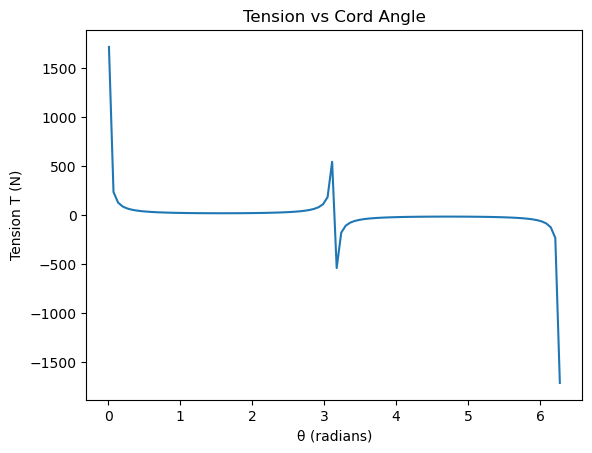

In [57]:
import numpy as np 
import matplotlib.pyplot as plt

m = 3.5 # kg 
l = 1.2 # m
g = 9.8 # m/s^2
theta = np.linspace( 0.01, np.pi * 2 - 0.01, 100 )

T = []

for th in theta:
    A = np.matrix( [
        [ 1, 0, -np.cos( th ) ],
        [ 0, 1,  np.sin( th ) ],
        [ 0, -l/2, l * np.sin( th ) * 0.5 ]
    ] )
    r = np.matrix( [ [0], [ m * g ], [ 0 ] ] )
    
    v = np.linalg.solve( A, r )
    T.append( v[ 2, 0 ] )

plt.plot( theta, T )
plt.xlabel( "θ (radians)" )
plt.ylabel( "Tension T (N)" )
plt.title( "Tension vs Cord Angle" )
plt.show()

**Exercise 15.4b**

The beam in Fig. 15.2 has length $\ell$, mass m, and makes angle $\theta$ with respect to the floor. The cord is horizontal with tension T. Derive the equations of static equilibrium for the beam. Write your equations in matrix form Av = r where the unknowns are the tension in the cord and the components of force that the floor exerts on the beam. Solve the matrix equation numerically using reasonable values for mg, $\ell$, and $\theta$.

ANSWER: 
- $F_x = 29.7$
- $F_y = 34.3$
- $T = 29.7$

In [41]:
import numpy as np 
import matplotlib.pyplot as plt

m = 3.5 # kg, from last problem 
l = 1.2 # m, from last problem
g = 9.8 # m/s^2
theta = np.pi / 6 # radians, numerically reasonable angle 

# Calculated so that Fx = T, Fy = mg, Tl sin theta - mg (l/2) cos theta
A = np.matrix([
    [ 1, 0, -1 ],
    [ 0, 1,  0 ],
    [ 0, 0, l * np.sin( theta ) ]
])

r = np.matrix( [ [ 0 ], [ m * g] , [ (l/2) * np.cos(theta) * m * g ] ] )

Fx, Fy, T = np.linalg.solve(A, r)
print( "Fx =", Fx )
print( "Fy =", Fy )
print( "T  =", T )

Fx = [[29.70467135]]
Fy = [[34.3]]
T  = [[29.70467135]]


**Exercise 15.5a**

Express Eqs. (15.11), (15.12) in matrix form, with the currents $I_1$, $I_2$, and $I_3$ as unknowns. Write a code to solve for the currents using the data $E_1 = 12 V$, $E_2 = 9 V$, $R_1 = 100 \Omega$, $R_2 = 120 \Omega$, and $R_3 = 65 \Omega$

Expressed in Matrix Form: 

$\begin{matrix}
1 & 1 & -1\\
R_1 & 0 & R_3\\
0 & R_2 & R_3
\end{matrix}$      *      $\begin{matrix}
I_{1}\\
I_{2}\\
I_{3}
\end{matrix}$ = $\begin{matrix}
0\\
E_1\\
E_2
\end{matrix}$

In [45]:
import numpy as np 

# Variables, E variables are in Volts (V), R variables are in Ohms (Omega) 
E1 = 12 
E2 = 9
R1 = 100
R2 = 120 
R3 = 65

# I1, I2, and I3 are unknowns 
A = np.matrix([
    [ 1.0, 1.0, -1.0 ],
    [ R1,  0.0,  R3 ],
    [ 0.0, R2,   R3 ]
])

r = np.matrix( [ [ 0.0 ], [ E1 ], [ E2 ] ] )

I1, I2, I3 = np.linalg.solve( A, r )

print( "I1 =", I1 )
print( "I2 =", I2 )
print( "I3  =", I3 )

I1 = [[0.0621673]]
I2 = [[0.02680608]]
I3  = [[0.08897338]]
